## Single image processing [resize, crope]

In [1]:
import numpy as np  
#from PIL import Image
import os, glob
import cv2

In [2]:
pic = cv2.imread('../../../data/data/1_d.jpg')
#img = cv2.cvtColor(pic, cv2.COLOR_GRAY2RGB)
# cv2.imshow('image', pic)
# cv2.waitKey(0)

In [7]:
iw, ih = pic.shape[0:2]

In [4]:
w = h = 256

In [13]:
ul_img = pic[:h, :w, :]
ur_img = pic[iw-w:,ih-h:, :]
cv2.imshow("upper-left", ul_img)
cv2.imshow("upper-right", ur_img)
cv2.imshow('image', pic)
cv2.waitKey(0)

-1

In [3]:
im256 = cv2.resize(pic, (256, 256), interpolation=cv2.INTER_LANCZOS4)
im128 = cv2.resize(pic, (128, 128), interpolation=cv2.INTER_LANCZOS4)

In [4]:
cv2.imwrite('../../../data/data/1_128.jpg', im128)
cv2.imwrite('../../../data/data/1_256.jpg', im256)
cv2.imshow("128", im128)
cv2.imshow("256", im256)
cv2.imshow('image', pic)
cv2.waitKey(0)

-1

In [10]:
img_shape = (256, 256)
im256_IN = cv2.resize(pic, img_shape, interpolation=cv2.INTER_NEAREST)
im256_IL = cv2.resize(pic, img_shape, interpolation=cv2.INTER_LINEAR)
im256_IA = cv2.resize(pic, img_shape, interpolation=cv2.INTER_AREA)
im256_IC = cv2.resize(pic, img_shape, interpolation=cv2.INTER_CUBIC)
im256_IL = cv2.resize(pic, img_shape, interpolation=cv2.INTER_LANCZOS4)
img_lis = [im256_IL, im256_IC, im256_IA, im256_IL, im256_IN]
n = 0
for i in img_lis:
    n+=1
    cv2.imshow(f"{n}",i)
cv2.imshow('image', pic)
cv2.waitKey(0)

-1

## sample image style transform by standard model

In [2]:
import tensorflow as tf 
import tensorflow_hub as hub

In [5]:
# hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
model = tf.keras.models.load_model('../../../data/models/magenta/')

In [6]:
model.summary()

AttributeError: '_UserObject' object has no attribute 'summary'

In [11]:
img_shape = (256, 256)
style_img = cv2.imread('../../../data/data/3.jpg')
cnt_img = cv2.imread('../../../data/data/1.jpg')
st256_img = cv2.resize(style_img, img_shape, interpolation=cv2.INTER_LANCZOS4).astype(np.float32)[np.newaxis, ...]/255.
cnt256_img = cv2.resize(cnt_img, img_shape, interpolation=cv2.INTER_LANCZOS4).astype(np.float32)[np.newaxis, ...]/255.


In [12]:
type(st256_img)

numpy.ndarray

In [13]:
print(st256_img.shape, cnt256_img.shape)

(1, 256, 256, 3) (1, 256, 256, 3)


In [14]:
outputs = hub_module(tf.constant(cnt256_img), tf.constant(st256_img))

In [22]:
outputs

[<tf.Tensor: shape=(1, 256, 256, 3), dtype=float32, numpy=
 array([[[[0.27438354, 0.22102356, 0.26284432],
          [0.37292925, 0.26931873, 0.3385616 ],
          [0.25686967, 0.19450876, 0.22638191],
          ...,
          [0.42805475, 0.3740492 , 0.24674568],
          [0.47566542, 0.4062272 , 0.27423793],
          [0.42998824, 0.3415861 , 0.22151566]],
 
         [[0.23208272, 0.18074134, 0.20910962],
          [0.30280623, 0.21573201, 0.26798585],
          [0.2850868 , 0.21106845, 0.22673438],
          ...,
          [0.5719032 , 0.4816142 , 0.35561278],
          [0.6257932 , 0.5240593 , 0.39796516],
          [0.58872616, 0.4637719 , 0.3371228 ]],
 
         [[0.18501651, 0.15624739, 0.1567926 ],
          [0.26046488, 0.20131686, 0.20813279],
          [0.4083283 , 0.3248884 , 0.30225047],
          ...,
          [0.53312707, 0.4922023 , 0.334536  ],
          [0.57596   , 0.5129428 , 0.35916042],
          [0.5315666 , 0.4469784 , 0.2949803 ]],
 
         ...,
 
       

In [25]:
out_img = np.squeeze(np.asarray(outputs))

array([[[0.27438354, 0.22102356, 0.26284432],
        [0.37292925, 0.26931873, 0.3385616 ],
        [0.25686967, 0.19450876, 0.22638191],
        ...,
        [0.42805475, 0.3740492 , 0.24674568],
        [0.47566542, 0.4062272 , 0.27423793],
        [0.42998824, 0.3415861 , 0.22151566]],

       [[0.23208272, 0.18074134, 0.20910962],
        [0.30280623, 0.21573201, 0.26798585],
        [0.2850868 , 0.21106845, 0.22673438],
        ...,
        [0.5719032 , 0.4816142 , 0.35561278],
        [0.6257932 , 0.5240593 , 0.39796516],
        [0.58872616, 0.4637719 , 0.3371228 ]],

       [[0.18501651, 0.15624739, 0.1567926 ],
        [0.26046488, 0.20131686, 0.20813279],
        [0.4083283 , 0.3248884 , 0.30225047],
        ...,
        [0.53312707, 0.4922023 , 0.334536  ],
        [0.57596   , 0.5129428 , 0.35916042],
        [0.5315666 , 0.4469784 , 0.2949803 ]],

       ...,

       [[0.3289957 , 0.21328296, 0.23215286],
        [0.23420961, 0.14032131, 0.1429099 ],
        [0.29920006, 0

In [26]:
from matplotlib import pyplot as plt 

(-0.5, 255.5, 255.5, -0.5)

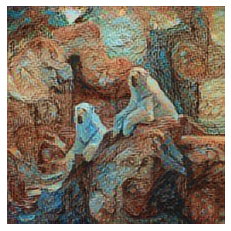

In [27]:
plt.imshow(out_img)
plt.axis("off")

## MSO dataset EDA

In [1]:
from os import listdir
from numpy import asarray
from numpy import savez_compressed
from PIL import Image
from matplotlib import pyplot

In [2]:
 
def load_image(filename):
	image = Image.open(filename)
	image = image.convert('RGB')
	pixels = asarray(image)
	return pixels

def load_imgs(dir):
    shapes = []
    for filename in listdir(dir):
        pixels = load_image(dir+filename)
        if pixels.shape not in shapes:
            shapes.append(pixels.shape)
    return shapes

In [3]:
shapes = load_imgs('../../../data/data/BAAT_dataset/')

In [4]:
print(shapes)

96, 3), (614, 560, 3), (614, 359, 3), (614, 294, 3), (614, 517, 3), (614, 502, 3), (614, 574, 3), (614, 351, 3), (354, 614, 3), (614, 491, 3), (599, 614, 3), (614, 448, 3), (614, 397, 3), (473, 614, 3), (614, 481, 3), (614, 210, 3), (614, 314, 3), (614, 612, 3), (614, 499, 3), (392, 614, 3), (614, 329, 3), (530, 614, 3), (403, 361, 3), (258, 312, 3), (329, 270, 3), (305, 240, 3), (270, 208, 3), (270, 225, 3), (268, 312, 3), (270, 206, 3), (234, 182, 3), (234, 184, 3), (326, 466, 3), (234, 196, 3), (140, 180, 3), (349, 448, 3), (850, 423, 3), (479, 362, 3), (456, 340, 3), (424, 320, 3), (440, 309, 3), (458, 294, 3), (443, 346, 3), (440, 346, 3), (440, 328, 3), (339, 451, 3), (270, 184, 3), (452, 337, 3), (460, 347, 3), (440, 364, 3), (440, 349, 3), (391, 368, 3), (462, 367, 3), (381, 422, 3), (400, 350, 3), (296, 422, 3), (354, 435, 3), (270, 179, 3), (371, 419, 3), (368, 407, 3), (380, 395, 3), (429, 351, 3), (432, 365, 3), (481, 321, 3), (409, 369, 3), (359, 420, 3), (358, 434, 3), (4

In [5]:
len(shapes)

5640